In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt


In [2]:
embeddings_dict={}
with open('C:/Users/marci/Documents/Portfolio/TwitterClassification/TwitterStream/data/glove.6B.50d.txt','rb') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
embeddings_dict[b'test']

array([ 0.13175 , -0.25517 , -0.067915,  0.26193 , -0.26155 ,  0.23569 ,
        0.13077 , -0.011801,  1.7659  ,  0.20781 ,  0.26198 , -0.16428 ,
       -0.84642 ,  0.020094,  0.070176,  0.39778 ,  0.15278 , -0.20213 ,
       -1.6184  , -0.54327 , -0.17856 ,  0.53894 ,  0.49868 , -0.10171 ,
        0.66265 , -1.7051  ,  0.057193, -0.32405 , -0.66835 ,  0.26654 ,
        2.842   ,  0.26844 , -0.59537 , -0.5004  ,  1.5199  ,  0.039641,
        1.6659  ,  0.99758 , -0.5597  , -0.70493 , -0.0309  , -0.28302 ,
       -0.13564 ,  0.6429  ,  0.41491 ,  1.2362  ,  0.76587 ,  0.97798 ,
        0.58507 , -0.30176 ], dtype=float32)

In [3]:

def find_closest_embeddings(embedding):
   return sorted(embeddings_dict.keys(), key=lambda word:
       spatial.distance.euclidean(embeddings_dict[word], embedding)
    )

In [4]:
targets = {
    'videogame': 0,
    'music': 1,
    'city': 2,
    'sport': 3
}

In [5]:
videogame_words = find_closest_embeddings(embeddings_dict[b"videogame"])
music_words = find_closest_embeddings(embeddings_dict[b"music"])
city_words = find_closest_embeddings(embeddings_dict[b"city"])
sport_words = find_closest_embeddings(embeddings_dict[b"sport"])

In [6]:
videogame_similars = np.asarray(videogame_words[:500])
music_similars = np.asarray(music_words[:500])
city_similars = np.asarray(city_words[:500])
sport_similars = np.asarray(sport_words[:500])

array([  6, 249,  48, ...,  64, 180,  50])

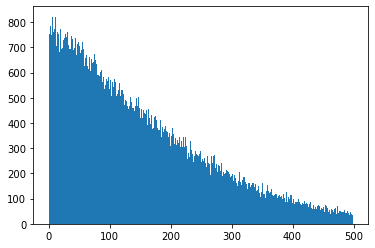

In [7]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 500)
xU, xL = x + 500, x
prob = ss.norm.cdf(xU, scale = 249) - ss.norm.cdf(xL, scale = 250)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1
rand_arr = np.random.choice(x, size = 16*10000, p = prob)
plt.hist(rand_arr, bins=len(x))
rand_arr

In [8]:
def get_artificial_phrase_matrix(seed):
    np.random.seed(seed)
    artificial_phrase_matrix = []
    for i in range(10000):
        phrase_size = np.random.randint(1,17)
        artificial_phrase_matrix.append(np.random.choice(x, size = phrase_size, p = prob))
    return artificial_phrase_matrix

In [9]:
videogame_apm = get_artificial_phrase_matrix(1)
music_apm = get_artificial_phrase_matrix(2)
city_apm = get_artificial_phrase_matrix(3)
sport_apm = get_artificial_phrase_matrix(4)

In [10]:
artificial_db = {
    'videogame':{
        'apm': videogame_apm, 
        'similar_words': videogame_similars
        },
    'music': {
        'apm': music_apm,
        'similar_words': music_similars
        },
    'city': {
        'apm': city_apm,
        'similar_words': city_similars
        },
    'sport': {
        'apm': sport_apm,
        'similar_words': sport_similars
        }
}

In [11]:
for subject_name in artificial_db.keys():
    subject = artificial_db[subject_name]
    sents = []
    for idx_list in subject['apm']:
        sent = subject['similar_words'][idx_list]
        sents.append(sent)
    subject['sentences'] = sents
    print('subject: ', subject_name)
    print(subject['sentences'][:2])

subject:  videogame
[array([b'licensees', b'alchemist', b'toonz', b'ics', b'snes', b'vpro'],
      dtype='|S17'), array([b'then-new', b'vpro', b'pgp', b'ruggedized', b'vb', b'visio',
       b'hobbyist', b'ps3'], dtype='|S17')]
subject:  music
[array([b'musician', b'soulful', b'new', b'dancing', b'trio', b'genre',
       b"'80s", b'performed', b'dancing'], dtype='|S16'), array([b'composed', b'hip', b'featured', b'blues', b'musician'],
      dtype='|S16')]
subject:  city
[array([b'suburbs', b'already', b'northwest', b'georgia', b'community',
       b'cities', b'central', b'northeastern', b'part', b'heavily',
       b'outskirts'], dtype='|S13'), array([b'including', b'center', b'newark', b'seen', b'downtown',
       b'waterfront', b'queens', b'public', b'offices', b'harlem',
       b'alone', b'northeast', b'chicago', b'school', b'today'],
      dtype='|S13')]
subject:  sport
[array([b'once', b'youth', b'paralympic', b'sportscar', b'good', b'model',
       b'motorcycle', b'here', b'doing',

# Bag of Words representation

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [13]:
for subject_name in artificial_db.keys():
    subject = artificial_db[subject_name]
    phrases = []
    for byte_list in subject['sentences']:
        word_list = list(map(lambda b: b.decode('UTF-8'), byte_list))
        phrase = ' '.join(word_list)
        phrases.append(phrase)
    subject['phrases'] = phrases
    print('subject: ', subject_name)
    print(subject['phrases'][:2])

subject:  videogame
['licensees alchemist toonz ics snes vpro', 'then-new vpro pgp ruggedized vb visio hobbyist ps3']
subject:  music
["musician soulful new dancing trio genre '80s performed dancing", 'composed hip featured blues musician']
subject:  city
['suburbs already northwest georgia community cities central northeastern part heavily outskirts', 'including center newark seen downtown waterfront queens public offices harlem alone northeast chicago school today']
subject:  sport
['once youth paralympic sportscar good model motorcycle here doing means sports', 'importantly rarely bicycle good sports athletics competes jockey amateur nordic baseball example youth formula neither']


In [14]:
random_tweets = pd.read_csv('C:/Users/marci/Documents/Portfolio/TwitterClassification/TwitterStream/data/random_tweets_cleaned.csv')
random_tweets = random_tweets.dropna()
random_tweets.head()

,id,text,annotations
0,1537864080857649152,Happy birthday!!!!!,[]
1,1537860083668832256,Jeongin now joining the crew and his weapon is...,"['Person', 'Musician', 'Music Genre']"
2,1537825048635097088,Interviewed more than 400 people and confirmed...,"['Brand Vertical', 'Brand Category', 'Brand']"
3,1537837652522651649,"Ass torture !! this is called ass torture, wh...",[]
4,1537845005129326592,Need for help!! im a victim of domestic abuse ...,[]


In [15]:
cv = CountVectorizer()
random_tweets_phrases = list(random_tweets.text)
for subject in artificial_db:
    random_tweets_phrases += artificial_db[subject]['phrases']
cv = cv.fit(random_tweets_phrases)

In [16]:
for subject_name in artificial_db:
    subject = artificial_db[subject_name]
    subject['sparse_vectorized_phrases'] = cv.transform(subject['phrases'])

In [17]:
# Quantidade de palavras encontradas
len(cv.vocabulary_.keys())

78480

## Preparing train and validation datasets

In [18]:
from scipy import sparse
from sklearn.model_selection import train_test_split

In [19]:
matrixes = []
for subject_name in targets:
    matrixes.append(artificial_db[subject_name]['sparse_vectorized_phrases'])
X = sparse.vstack(matrixes)
X

<40000x78480 sparse matrix of type '<class 'numpy.int64'>'
	with 343978 stored elements in Compressed Sparse Row format>

In [20]:
target_values = []
for subject_name, target in targets.items():
    length = artificial_db[subject_name]['sparse_vectorized_phrases'].shape[0]
    values = np.zeros(length, dtype=int) + target
    target_values.append(values)
y = np.concatenate(target_values, axis=0)
print(y, y.shape)

[0 0 0 ... 3 3 3] (40000,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
X_train.shape

(30000, 78480)

# Training Model with sparse data

In [22]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn import metrics
from time import time

### Logistic Regression

In [23]:
_penalty = 'l1'
_solver = 'liblinear'
clf_lr_1 = LogisticRegression(penalty=_penalty, solver=_solver)

_penalty = 'l2'
_solver = 'liblinear'
clf_lr_2 = LogisticRegression(penalty=_penalty, solver=_solver)

_loss = 'hinge'
_penalty = 'l1'
clf_sgd_1 = SGDClassifier(loss=_loss, penalty=_penalty)

_loss = 'perceptron'
_penalty = 'l1'
clf_sgd_2 = SGDClassifier(loss=_loss, penalty=_penalty)

_loss = 'hinge'
_penalty = 'l2'
clf_sgd_3 = SGDClassifier(loss=_loss, penalty=_penalty)

_loss = 'perceptron'
_penalty = 'l2'
clf_sgd_4 = SGDClassifier(loss=_loss, penalty=_penalty)

clfs = [clf_lr_1, clf_lr_2, clf_sgd_1, clf_sgd_2, clf_sgd_3, clf_sgd_4]

In [24]:
def evaluate_model(clf):
    
    #training
    print("="*80)
    print("Training: ")
    print(clf)
    
    _scoring = {'Accuracy':'accuracy', 'log loss':'neg_log_loss'}
    _scoring = {'Accuracy':'accuracy', 'f1 score':'f1_weighted'}
    _cv = ShuffleSplit(n_splits=10, test_size=.25)
    cv_results = cross_validate(clf, X, y, scoring=_scoring, cv=_cv)

    #print("train time: %0.3fs" % cv_results['fit_time'])
    #print("score time:  %0.3fs" % cv_results['score_time'])
    scores = cv_results
    print('\nMeans:')
    for metric in _scoring:
        print("%s:   %0.3f" % (metric, cv_results['test_'+metric].mean()))
    
    #print('\nRaw results:')
    #for metric in _scoring:
    #    print("%s:   " % metric, cv_results['test_'+metric])

In [25]:
for clf in clfs:
    evaluate_model(clf)

Training: 
LogisticRegression(penalty='l1', solver='liblinear')

Means:
Accuracy:   0.989
f1 score:   0.989
Training: 
LogisticRegression(solver='liblinear')

Means:
Accuracy:   0.996
f1 score:   0.996
Training: 
SGDClassifier(penalty='l1')

Means:
Accuracy:   0.982
f1 score:   0.982
Training: 
SGDClassifier(loss='perceptron', penalty='l1')

Means:
Accuracy:   0.965
f1 score:   0.965
Training: 
SGDClassifier()

Means:
Accuracy:   0.995
f1 score:   0.995
Training: 
SGDClassifier(loss='perceptron')

Means:
Accuracy:   0.991
f1 score:   0.991


## Preparing test dataset

In [26]:
import ast
from collections import Counter
import random

In [27]:
cv.transform(random_tweets.text.head())

<5x78480 sparse matrix of type '<class 'numpy.int64'>'
	with 63 stored elements in Compressed Sparse Row format>

In [28]:
random_tweets['annotations'] = random_tweets['annotations'].str.lower()
random_tweets['annotations'] = random_tweets['annotations'].str.replace('music genre', 'music')
random_tweets['annotations'] = random_tweets['annotations'].str.replace('video game', 'videogame')
random_tweets['annotations'] = random_tweets['annotations'].str.replace('cities', 'city')
random_tweets['annotations'] = random_tweets['annotations'].apply(ast.literal_eval)
random_tweets

,id,text,annotations
0,1537864080857649152,Happy birthday!!!!!,[]
1,1537860083668832256,Jeongin now joining the crew and his weapon is...,"[person, musician, music]"
2,1537825048635097088,Interviewed more than 400 people and confirmed...,"[brand vertical, brand category, brand]"
3,1537837652522651649,"Ass torture !! this is called ass torture, wh...",[]
4,1537845005129326592,Need for help!! im a victim of domestic abuse ...,[]
...,...,...,...
130168,1537834573916086273,Kue lapis nct dream,"[person, person, musician, musician, music]"
130169,1537854815635927040,My comfort in the chaos.. ||,"[person, actor]"
130170,1537828257290407936,"Guys, ini nct dream era apa? gils, their side ...","[person, person, musician, musician, music]"
130171,1537832359306792966,"Ingat ttp slalu : , ,",[]


In [29]:
annotation_names = np.unique(np.concatenate(random_tweets['annotations']))
annotation_names[:9]

array(['actor', 'american football game', 'animals', 'athlete',
       'award show', 'baseball game', 'basketball game', 'book',
       'book genre'], dtype='<U32')

In [30]:
annot_frequency = Counter(np.concatenate(random_tweets['annotations']))
list(annot_frequency.items())[:5]

[('person', 28233),
 ('musician', 9619),
 ('music', 7988),
 ('brand vertical', 6076),
 ('brand category', 10960)]

In [31]:
def get_least_frequenty_annotation(x):
    if (len(x)==0):
        return 'Unkown'
    least_freq = x[0]
    for name in x[1:]:
        if (annot_frequency[name] < annot_frequency[least_freq]):
            least_freq = name
    return least_freq

In [32]:
random_tweets['annotations'] = random_tweets['annotations'].apply(get_least_frequenty_annotation)

In [33]:
base_test = random_tweets[random_tweets['annotations'].isin(targets)]
base_test.head()

,id,text,annotations
1,1537860083668832256,Jeongin now joining the crew and his weapon is...,music
13,1537843356767621122,Choeaedol giveaway ! follow like and rt drop...,music
38,1537853213411627009,Jeon jungkook was embarrassed to do the ending...,music
41,1537842564048494593,Roses noodles and doughnuts ed frost and daugh...,music
42,1537859576145772544,Presence on the global stage means that the wo...,music


In [34]:
Counter(base_test['annotations'])

Counter({'music': 3972, 'city': 1037, 'videogame': 1265, 'sport': 278})

In [35]:
base_test['annotations'] = base_test['annotations'].replace(targets)
Counter(base_test['annotations'])

C:\Users\marci\AppData\Local\Temp\ipykernel_7116\2192653802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_test['annotations'] = base_test['annotations'].replace(targets)


Counter({1: 3972, 2: 1037, 0: 1265, 3: 278})

In [36]:
base_test

,id,text,annotations
1,1537860083668832256,Jeongin now joining the crew and his weapon is...,1
13,1537843356767621122,Choeaedol giveaway ! follow like and rt drop...,1
38,1537853213411627009,Jeon jungkook was embarrassed to do the ending...,1
41,1537842564048494593,Roses noodles and doughnuts ed frost and daugh...,1
42,1537859576145772544,Presence on the global stage means that the wo...,1
...,...,...,...
130134,1537826952878465024,I don't think our next live will be in 2 years...,1
130164,1537846137620959233,Choeadol &gt; 600 hearts &gt; follow me &amp; ...,1
130168,1537834573916086273,Kue lapis nct dream,1
130170,1537828257290407936,"Guys, ini nct dream era apa? gils, their side ...",1


In [37]:
_penalty = 'l1'
_solver = 'liblinear'
clf_lr_1 = LogisticRegression(penalty=_penalty, solver=_solver)

_penalty = 'l2'
_solver = 'liblinear'
clf_lr_2 = LogisticRegression(penalty=_penalty, solver=_solver)

_loss = 'hinge'
_penalty = 'l1'
clf_sgd_1 = SGDClassifier(loss=_loss, penalty=_penalty)

_loss = 'perceptron'
_penalty = 'l1'
clf_sgd_2 = SGDClassifier(loss=_loss, penalty=_penalty)

_loss = 'hinge'
_penalty = 'l2'
clf_sgd_3 = SGDClassifier(loss=_loss, penalty=_penalty)

_loss = 'perceptron'
_penalty = 'l2'
clf_sgd_4 = SGDClassifier(loss=_loss, penalty=_penalty)

clfs = [clf_lr_1, clf_lr_2, clf_sgd_1, clf_sgd_2, clf_sgd_3, clf_sgd_4]

In [38]:
X_train,_,y_train,_ = train_test_split(X,y,test_size=.01,shuffle=True)
X_test = cv.transform(base_test['text'])
y_test = base_test['annotations']

In [39]:
def test_model(clf):
    
    #training
    print("="*80)
    print("Training: ")
    print(clf)
    
    t0 = time()
    clf.fit(X_train, y_train)
    fit_time = time() - t0
    
    print("train time: %0.3fs" % fit_time)
    
    t0 = time()
    prediction = clf.predict(X_test)
    score_time = time() - t0
    
    print("score time:  %0.3fs" % score_time)
    
    print('\nRaw results:')
    print("Accuracy:  %.3f" % metrics.accuracy_score(y_test, prediction))
    print("f1 weighted score:  %.3f" % metrics.f1_score(y_test, prediction, average='weighted'))

In [40]:
for clf in clfs:
    test_model(clf)

Training: 
LogisticRegression(penalty='l1', solver='liblinear')
train time: 0.377s
score time:  0.002s

Raw results:
Accuracy:  0.233
f1 weighted score:  0.190
Training: 
LogisticRegression(solver='liblinear')
train time: 0.482s
score time:  0.001s

Raw results:
Accuracy:  0.230
f1 weighted score:  0.184
Training: 
SGDClassifier(penalty='l1')
train time: 0.165s
score time:  0.002s

Raw results:
Accuracy:  0.341
f1 weighted score:  0.344
Training: 
SGDClassifier(loss='perceptron', penalty='l1')
train time: 0.153s
score time:  0.003s

Raw results:
Accuracy:  0.253
f1 weighted score:  0.265
Training: 
SGDClassifier()
train time: 0.102s
score time:  0.002s

Raw results:
Accuracy:  0.239
f1 weighted score:  0.200
Training: 
SGDClassifier(loss='perceptron')
train time: 0.108s
score time:  0.002s

Raw results:
Accuracy:  0.240
f1 weighted score:  0.200


## Preparing data for Fasttext

In [60]:
targets

{'videogame': 0, 'music': 1, 'city': 2, 'sport': 3}

In [63]:
labels = dict(zip(targets.values(),targets.keys()))
labels

{0: 'videogame', 1: 'music', 2: 'city', 3: 'sport'}

In [67]:
y_series = '__label__' + pd.Series(y).replace(labels)
y_series.head()

0    __label__videogame
1    __label__videogame
2    __label__videogame
3    __label__videogame
4    __label__videogame
dtype: object

In [81]:
X[0].indices

array([ 5515, 34660, 41630, 64793, 70637, 74795])

In [85]:
reverse_vectorization = dict(zip(cv.vocabulary_.values(), cv.vocabulary_.keys()))

In [97]:
with open('artificial_db.txt', 'w') as file:
    for i in range(X.shape[0]):
        line = y_series[i] + ', '
        words = [reverse_vectorization[idx] for idx in X[i].indices]
        line = line + ' '.join(words) + '\n'
        file.write(line)
    

## Testing Fasttext

In [110]:
import fasttext

In [104]:
model = fasttext.train_supervised(input="artificial_db.txt")

In [107]:
phrase1 = "Explorer elizabeth"" is a fake roblox hacker. she got banned! roblox banned her because of ""child endangerment!"" and offensive item because it's completely different. the reason why ""explorer elizabeth"" got banned is ""exploiting"" follow us for more news."
phrase2 = "London, spurs and champions league music. that is my dream"" - yves bissouma, 2022. inject it"

In [108]:
model.predict(phrase1)

(('__label__city,',), array([0.98965675]))

In [109]:
model.predict(phrase2)

(('__label__city,',), array([0.94191366]))